In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

In [0]:
data = pd.read_csv('/content/Apple share.csv')
cl = data['close']
cl=np.array(cl)

In [4]:
scl = MinMaxScaler()
#Scale the data
cl = cl.reshape(cl.shape[0],1)
cl = scl.fit_transform(cl)
cl

array([[0.00529196],
       [0.00451814],
       [0.00157154],
       ...,
       [0.97853473],
       [0.96911423],
       [1.        ]])

In [5]:
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
X,y = processData(cl,5)
X_train,X_test = X[:int(X.shape[0]*0.80)],X[int(X.shape[0]*0.80):]
y_train,y_test = y[:int(y.shape[0]*0.80)],y[int(y.shape[0]*0.80):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2009
503
2009
503


In [21]:
model = Sequential()
model.add(LSTM(256,input_shape=(5,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),shuffle=False)

Train on 2009 samples, validate on 503 samples
Epoch 1/60
2009/2009 [==============================] - 2s 904us/step - loss: 0.0024 - val_loss: 0.0111
Epoch 2/60
2009/2009 [==============================] - 1s 742us/step - loss: 0.0036 - val_loss: 0.0064
Epoch 3/60
2009/2009 [==============================] - 1s 737us/step - loss: 0.0034 - val_loss: 0.0035
Epoch 4/60
2009/2009 [==============================] - 1s 743us/step - loss: 0.0033 - val_loss: 0.0030
Epoch 5/60
2009/2009 [==============================] - 1s 744us/step - loss: 0.0020 - val_loss: 0.0019
Epoch 6/60
2009/2009 [==============================] - 2s 747us/step - loss: 5.0752e-04 - val_loss: 0.0022
Epoch 7/60
2009/2009 [==============================] - 1s 736us/step - loss: 7.8839e-05 - val_loss: 0.0021
Epoch 8/60
2009/2009 [==============================] - 1s 735us/step - loss: 7.7552e-05 - val_loss: 0.0023
Epoch 9/60
2009/2009 [==============================] - 1s 742us/step - loss: 7.5230e-05 - val_loss: 0.0025
E

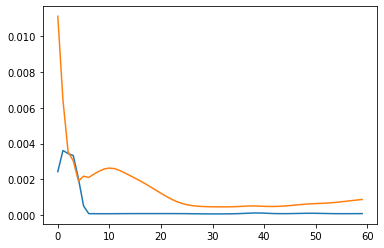

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

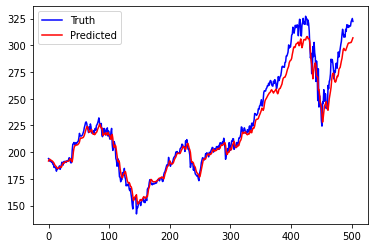

In [23]:
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)),color='blue',label='Truth')
plt.plot(scl.inverse_transform(Xt),color='red',label='Predicted')
plt.legend(loc='upper left')
plt.show()

In [0]:
# print(scl.inverse_transform(Xt))
# print(scl.inverse_transform(y_test.reshape(-1,1)))


# Well, the issue here is, you are using writerows instead of writerow

pred1 = pd.DataFrame(scl.inverse_transform(Xt), columns=['predictedstocks']).to_csv('data1.csv')

In [29]:
act = []
pred = []
#for i in range(503):
i=256

Xt = model.predict(X_test[i].reshape(1,5,1))
print('predicted:{0}, actual:{1}'.format(scl.inverse_transform(Xt),scl.inverse_transform(y_test[i].reshape(-1,1))))
pred.append(scl.inverse_transform(Xt))
act.append(scl.inverse_transform(y_test[i].reshape(-1,1)))


predicted:[[193.46225]], actual:[[194.15]]
